In [1]:
import numpy as np
import glob, os
import matplotlib.pyplot as plt

from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure, FilledBands
from blg_strain.utils.utils import print_time
from blg_strain.utils.saver import Saver

In [2]:
%matplotlib notebook

In [3]:
path = r'E:\sBLG_data\2020-08-07\StrainedLattice_eps0.010_theta0.000\*.h5'

In [4]:
sl = StrainedLattice.load(r'E:\sBLG_data\2020-08-07\StrainedLattice_eps0.010_theta0.000.h5')
# bs_paths[0]

In [5]:
# First pass - get Delta and EF values
bs_paths = glob.glob(path)
bs_paths.sort(key=os.path.getmtime)

Deltas = np.empty(len(bs_paths))
for i, bs_path in enumerate(bs_paths):
    if 'summary' in bs_path:
        continue
    start = bs_path.find('_Delta') + 6  # start of Delta value
    end = bs_path.find('.h5')  # end of Delta value
    Deltas[i] = float(bs_path[start:end])
    
    fb_paths = glob.glob(bs_path[:-3] + '\*.h5')
    fb_paths.sort(key=os.path.getmtime)

EFs = np.empty(len(fb_paths))    
for j, fb_path in enumerate(fb_paths):
    start = fb_path.find('_EF') + 3  # start of EF value
    end = fb_path.find('_T') # end of EF value
    EFs[j] = float(fb_path[start:end])

In [111]:
# Second pass - get ME coef alpha
bs_paths = glob.glob(path)
bs_paths.sort(key=os.path.getmtime)

alphas = np.empty((len(Deltas), len(EFs), 2))
ns = np.empty((len(Deltas), len(EFs), 2))
Ds = np.empty((len(Deltas), len(EFs), 2))

for i, bs_path in enumerate(bs_paths):
    if 'summary' in bs_path:
        continue
    fb_paths = glob.glob(bs_path[:-3] + '\*.h5')
    fb_paths.sort(key=os.path.getmtime)   
    for j, fb_path in enumerate(fb_paths):
        fb = FilledBands.load(fb_path)
        alphas[i,j] = fb.alpha
        ns[i,j] = fb.n
        Ds[i,j] = fb.D

In [112]:
alphasx, alphasy = alphas[:,:,0], alphas[:,:,1]

In [113]:
alphasx.shape, alphasy.shape, Deltas.shape, EFs.shape

((42, 61), (42, 61), (42,), (61,))

In [8]:
alphasx = alphasx[:-1,:]
alphasy = alphasy[:-1,:]
ns = ns[:-1,:]
Ds = Ds[:-1,:]
Deltas = Deltas[:-1]

NameError: name 'alphasx' is not defined

In [7]:
factor = .1
vmax = abs(alphasx).max() * factor
vmin = -vmax

fig, ax = plt.subplots()
im = ax.pcolormesh(EFs, Deltas[:], alphasx[:,:], cmap='RdBu', vmin=vmin, vmax=vmax)

ax.set_xlabel('$E_F$ (meV)')
ax.set_ylabel('$\Delta$ (meV)')
cb = plt.colorbar(im, label=r'$\alpha$')

ax.plot(EFs, 2*EFs, 'k--')
ax.plot(EFs, -2*EFs, 'k--')
# ax.set_ylim(-50,50)

NameError: name 'alphasx' is not defined

In [119]:
s.Deltas = Deltas
s.Ds = Ds
s.EFs = EFs
s.alphasx = alphasx
s.alphasy = alphasy
s.ns = ns

In [120]:
s.save(r'E:\sBLG_data\2020-08-07\StrainedLattice_eps0.010_theta0.000\summary.h5')

In [6]:
s = Saver.load(r'E:\sBLG_data\2020-08-07\StrainedLattice_eps0.010_theta0.000\summary.h5')

<IPython.core.display.Javascript object>


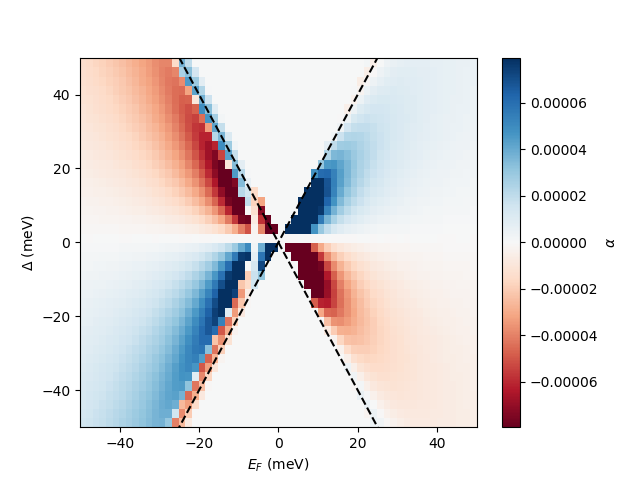

(-50, 50)

In [10]:
factor = .1
vmax = abs(s.alphasx).max() * factor
vmin = -vmax

fig, ax = plt.subplots()
im = ax.pcolormesh(s.EFs, s.Deltas[:], s.alphasx[:,:], cmap='RdBu', vmin=vmin, vmax=vmax)

ax.set_xlabel('$E_F$ (meV)')
ax.set_ylabel('$\Delta$ (meV)')
cb = plt.colorbar(im, label=r'$\alpha$')

ax.plot(EFs, 2*EFs, 'k--')
ax.plot(EFs, -2*EFs, 'k--')
ax.set_ylim(-50,50)

# Splines

## Bivariate - artifacts

In [125]:
from scipy.interpolate import SmoothBivariateSpline, RectBivariateSpline

In [ ]:
SmoothBivariateSpline()

In [134]:
Deltas2 = np.linspace(Deltas.min(), Deltas.max(), 200)
EFs2 = np.linspace(EFs.min(), EFs.max(), 200)

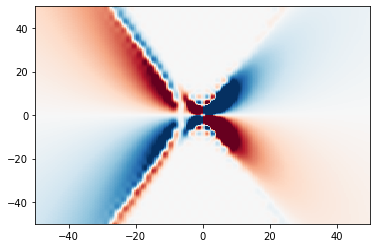

In [136]:
fig, ax = plt.subplots()
spl = RectBivariateSpline(Deltas, EFs, alphasx)

vmax = abs(alphasx).max() * factor
vmin = -vmax

im = ax.pcolormesh(EFs2, Deltas2, spl(Deltas2, EFs2), cmap='RdBu', vmin=vmin, vmax=vmax)

## Univariate vs Delta

In [238]:
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

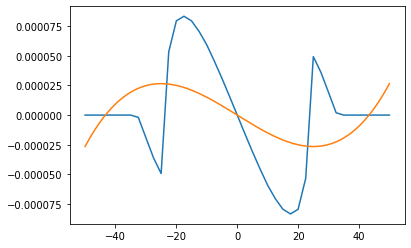

In [153]:
fig, ax = plt.subplots()
ax.plot(Deltas, alphasx[:,21])
ax.plot(Deltas2, alphasspl[:,21])

In [145]:
Deltas2 = np.linspace(Deltas.min(), Deltas.max(), 200)

In [146]:
alphasx.shape, Deltas.shape

((41, 61), (41,))

In [148]:
alphasspl = np.empty((Deltas2.shape[0], EFs.shape[0]))

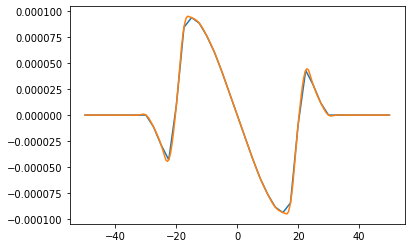

In [245]:
fig, ax = plt.subplots()
for i in range(EFs.shape[0]):
    spl = UnivariateSpline(Deltas, alphasx[:, i], k=2, s=0)
    if i == 22:
        ax.plot(Deltas, alphasx[:, i])
        ax.plot(Deltas2, spl(Deltas2))
    alphasspl[:, i] = spl(Deltas2)

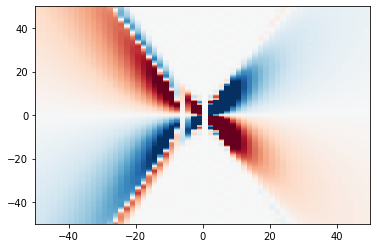

In [246]:
fig, ax = plt.subplots()

vmax = abs(alphasx).max() * factor
vmin = -vmax

im = ax.pcolormesh(EFs, Deltas2, alphasspl, cmap='RdBu', vmin=vmin, vmax=vmax)

# To do:
- Calculate denser points more intelligently. Start from lowest EF, skip calculations once alpha goes to zero, then start from highest EF and work backwards
- Spline interpolation versus Delta?

# Focus on close to zero:
Only 200x200 points - this was perhaps too coarse

In [248]:
path = r"E:\sBLG_data\2020-08-10\StrainedLattice_eps0.010_theta0.000\summary.h5"

In [249]:
s = Saver.load(path)

In [251]:
alphasx, alphasy = s.alphas[:,:,0], s.alphas[:,:,1]

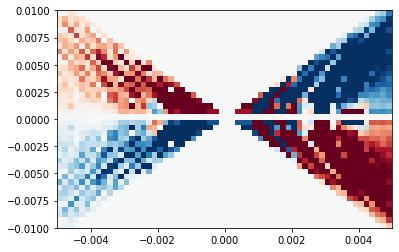

In [257]:
fig, ax = plt.subplots()

factor=0.01
vmax = abs(alphasx).max() * factor
vmin = -vmax

im = ax.pcolormesh(s.EFs, s.Deltas, alphasx, cmap='RdBu', vmin=vmin, vmax=vmax)

## Why is this noisy?

In [2]:
path = r"E:\sBLG_data\2020-08-10\StrainedLattice_eps0.010_theta0.000\BandStructure_Nkx200_Nky200_Delta-5.000\FilledBands_EF-5.000_T0.0.h5"
path = r"E:\sBLG_data\2020-08-10\StrainedLattice_eps0.010_theta0.000\BandStructure_Nkx200_Nky200_Delta-5.000.h5"
s = Saver.load(path)

In [3]:
%matplotlib notebook

In [4]:
from blg_strain.microscopic import feq_func, grad_feq_func_2

In [5]:
f = feq_func(s.K.E, 0.004, 5)
fx, fy = grad_feq_func_2(s.K.kxa, s.K.kya, s.K.E, 0.02, 5)

In [6]:
fx

array([[[-0.00000000e+000, -0.00000000e+000, -0.00000000e+000, ...,
         -0.00000000e+000, -0.00000000e+000, -0.00000000e+000],
        [-0.00000000e+000, -0.00000000e+000, -0.00000000e+000, ...,
         -0.00000000e+000, -0.00000000e+000, -0.00000000e+000],
        [-0.00000000e+000, -0.00000000e+000, -0.00000000e+000, ...,
         -0.00000000e+000, -0.00000000e+000, -0.00000000e+000],
        ...,
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000]],

       [[-8.33658217e-219, -3.95450945e-217, -1.85690252e-215, ...,
         -1.85710037e-215, -3.95493191e-217, -8.33747510e-219],
        [-1.25132748e-217, -5.95203301e-216, -2.80274978e-214

<IPython.core.display.Javascript object>


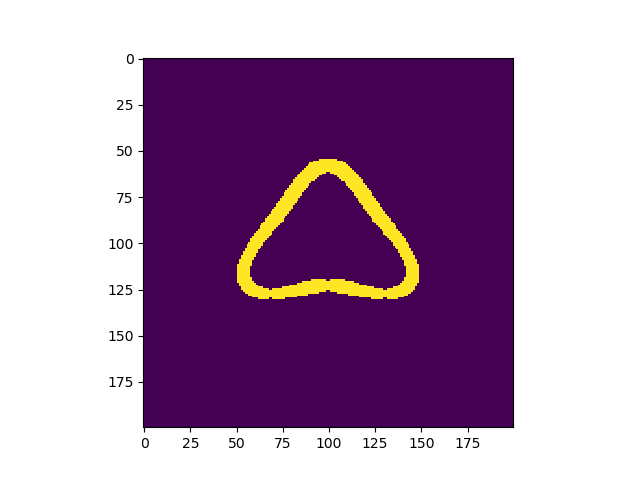

In [7]:
fig, ax = plt.subplots()
ax.imshow(abs(fy[2])>.1)

In [13]:
from skimage.measure import find_contours

In [8]:
s.K._get_splines()

In [9]:
from blg_strain.utils.utils import densify

In [84]:
s.K._densify(200, 200)

In [77]:
from scipy.ndimage import zoom
from skimage.filters import gaussian

In [78]:
from blg_strain.utils.const import kB

<IPython.core.display.Javascript object>


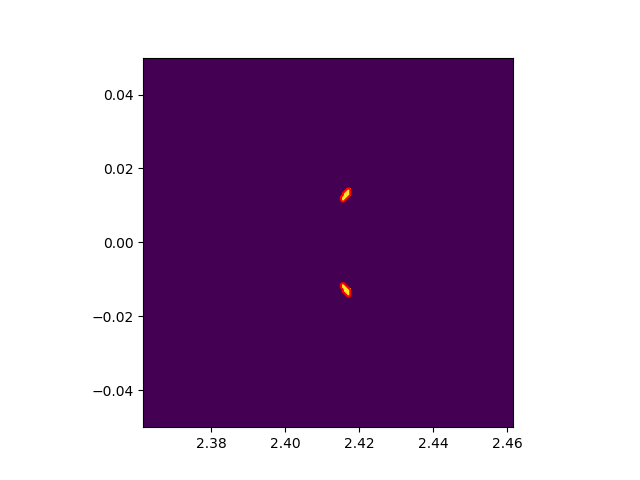

In [137]:
EF = 0.003
T = 0
f = feq_func(s.K.E, EF, T)
gx, gy = grad_feq_func_2(s.K.kxa, s.K.kya, s.K.E, EF, T)

fig, ax = plt.subplots()
ax.pcolormesh(s.K.Kxa, s.K.Kya, f[2])
ax.set_aspect(1)
ax.contour(s.K.Kxa, s.K.Kya, f[2], [.5], colors='r')

<IPython.core.display.Javascript object>


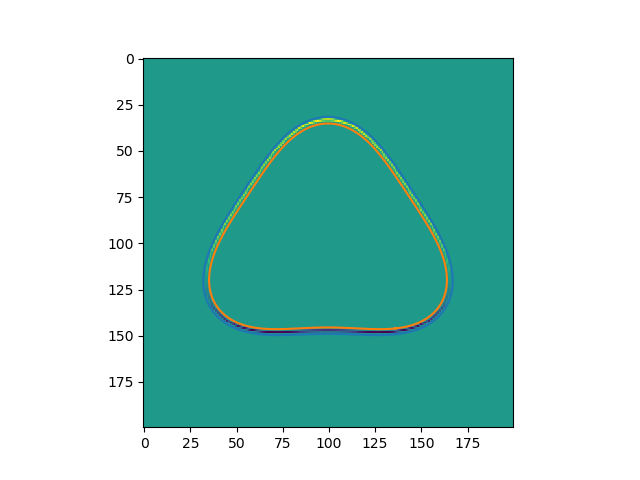

In [86]:
EF = 0.05
T = 5
f = feq_func(s.K.E, EF, T)
gx, gy = grad_feq_func_2(s.K.kxa, s.K.kya, s.K.E, EF, T)
h = abs(s.K.E[2] - EF) - 6*kB*T
contours = find_contours(h, 0)
fig, ax = plt.subplots()
ax.imshow(gx[2])
for n, c in enumerate(contours):
    ax.plot(c[:,1], c[:,0])

<IPython.core.display.Javascript object>


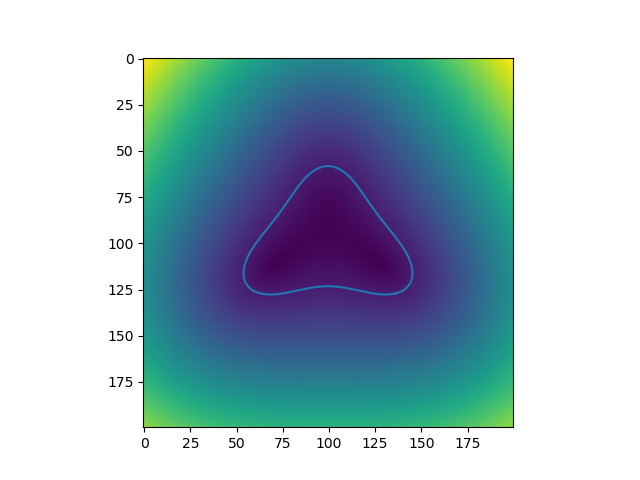

In [98]:
g = s.K.E[2] - 0.02
contours = find_contours(g, 0)
fig, ax = plt.subplots()
ax.imshow(g)
for n, c in enumerate(contours):
    ax.plot(c[:,1], c[:,0])

In [ ]:
EF = 0.05
T = 5
f = feq_func(s.K.E, EF, T)
gx, gy = grad_feq_func_2(s.K.kxa, s.K.kya, s.K.E, EF, T)
h = abs(s.K.E[2] - EF) - 6*kB*T
contours = find_contours(h, 0)
fig, ax = plt.subplots()
ax.imshow(gx[2])
for n, c in enumerate(contours):
    ax.plot(c[:,1], c[:,0])

## Method for sampling intelligently

In [16]:
path = r"E:\sBLG_data\2020-08-10\StrainedLattice_eps0.010_theta0.000\BandStructure_Nkx200_Nky200_Delta-5.000.h5"
s = Saver.load(path)

1) Calculate fermi distribution

In [17]:
from blg_strain.microscopic import feq_func

EF = 0.05
T = .1
f = feq_func(s.K.E, EF, T)

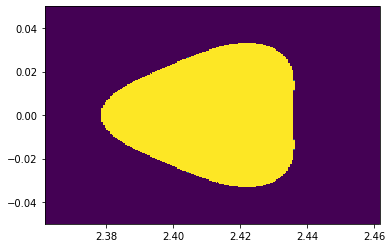

In [18]:
fig, ax = plt.subplots()
ax.pcolormesh(s.K.Kxa, s.K.Kya, f[2])

2) Find the contour E == EF. This corresponds to f == 1/2. We do not want to calculate f first, because we lose information, especially at low temperature where the width of the step transition is smaller than the grid spacing.

In [19]:
from skimage.measure import find_contours

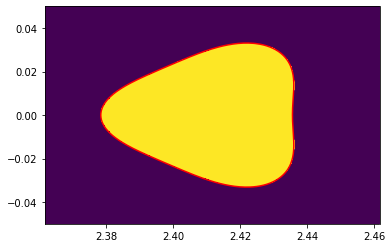

In [20]:
contours = find_contours(s.K.E[2], EF)
fig, ax = plt.subplots()
ax.pcolormesh(s.K.Kxa, s.K.Kya, f[2])

scalex, scaley = (s.K.Kxa.max()-s.K.Kxa.min()) / (s.K.Kxa.shape[0]-1), (s.K.Kya.max()-s.K.Kya.min()) / (s.K.Kxa.shape[1]-1),

for c in contours:
    ax.plot(s.K.Kxa.min() + c[:,0] * scalex, s.K.Kya.min() + c[:,1] * scaley, color='r')


3) At zero temperature, evaluate integrand along the contour

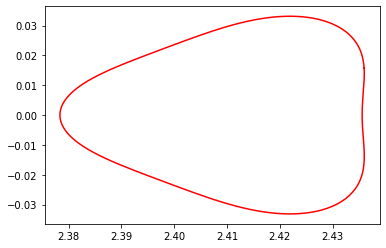

In [21]:
fig, ax = plt.subplots()

for c in contours:
    ax.plot(s.K.Kxa.min() + c[:,0] * scalex, s.K.Kya.min() + c[:,1] * scaley, color='r')



# Check: how does changing grid spacing influence the contour?

In [45]:
Delta = -2.5e-3
bs = BandStructure(sl, Delta=Delta)

<IPython.core.display.Javascript object>


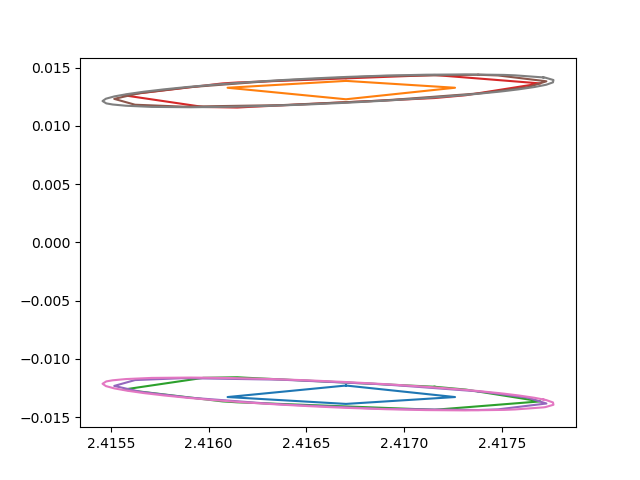

In [47]:
fig, ax = plt.subplots()

for N in [50, 100, 200, 500]:
    bs.calculate(N, N)

    contours = find_contours(bs.K.E[2], .002)
    scalex, scaley = (bs.K.Kxa.max()-bs.K.Kxa.min()) / (bs.K.Kxa.shape[0]-1), (bs.K.Kya.max()-bs.K.Kya.min()) / (bs.K.Kxa.shape[1]-1),

    for c in contours:        
        ax.plot(s.K.Kxa.min() + c[:,0] * scalex, s.K.Kya.min() + c[:,1] * scaley)



In [48]:
fb = FilledBands(bs, EF=0.005)

In [50]:
fb.calculate()

In [55]:
bs.calculate(200,200)

# How do K and K' compare? Always flipped over x?

In [103]:
sl = StrainedLattice(eps=0.01, theta=0.1)
sl.calculate()

In [104]:
bs = BandStructure(sl, Delta=0.005)
bs.calculate(500,500)

<IPython.core.display.Javascript object>


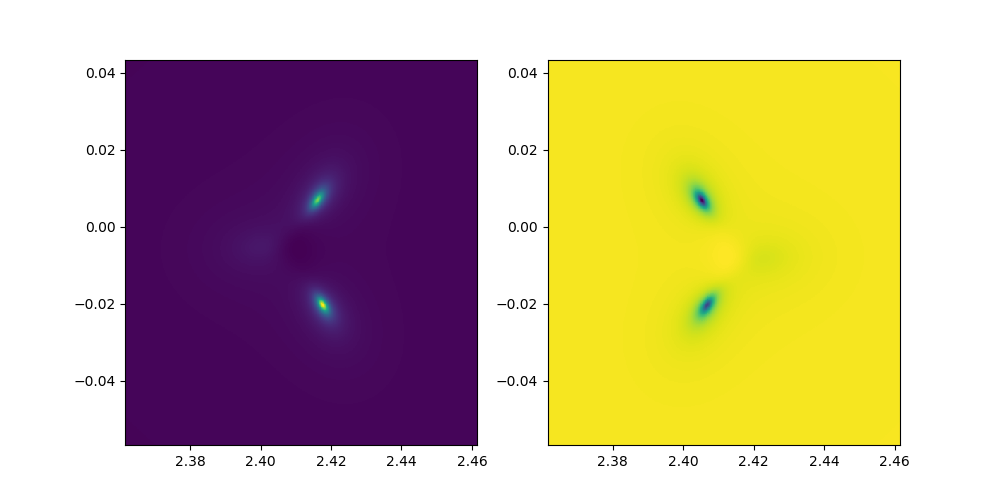

In [115]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
vmin = -.01
vmax = .01
ax[0].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Mu[2])
ax[1].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.Kp.Mu[2])

<IPython.core.display.Javascript object>


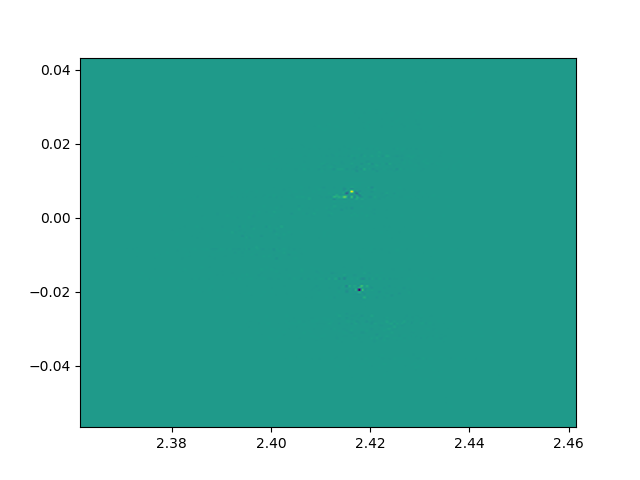

In [112]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Mu[2] + bs.Kp.Mu[2][::-1, ::-1])

# Is contribution from each valley equal? Under any strain?

In [6]:
import numpy as np
import glob, os
import matplotlib.pyplot as plt

from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure, FilledBands
from blg_strain.utils.utils import print_time
from blg_strain.utils.saver import Saver

In [7]:
sl = StrainedLattice(eps=0.01, theta=0)
                     
sl.calculate(turn_off=['gamma3', 'gamma4', 'gamman', 'dimer'])

In [8]:
bs = BandStructure(sl, Delta=0.005)
bs.calculate(200,200)

In [9]:
fb = FilledBands(bs, EF=0.01)
fb.calculate()

In [10]:
fb.alpha_K

array([-2.44447808e-09, -3.64361428e-12])

There is a small residual y component that is opposite signs in the valleys. Why? Is this expected?
This is true even with all gammas turned off. This is too small to matter. Change the code to only calculate for one valley then multiply by 2.

In [14]:
bs.K